<table class='tfo-notebook-buttons' align='left'>
<td style='border: none;'>
<a target='blank' href='https://colab.research.google.com/github/Hari31416/mini-project/blob/main/codes/putting_it_all_together.ipynb?hl=en'><img src='https://colab.research.google.com/img/colab_favicon_256px.png' width='28' height='28'/>Run on Google Colab</a></td>
<td style='border: none;'>
<a target='blank' href='https://github.com/Hari31416/mini-project/blob/main/codes/putting_it_all_together.ipynb'><img src='https://cdn3.iconfinder.com/data/icons/inficons/512/github.png' width='28' height='28'/>View on Github</a></td>
</table>

The notebook uses three methods to extract the center and other relevant info about the drop in the image. These methods are:
1. Cropping Image Dynamically 
2. Subtracting all the Images from a Reference Image
3. Fitting an Ellipse
   
We have also made some preliminary analysis for all the three methods.

All the code can be found on github repository, specifically on the folder: <a href="https://github.com/Hari31416/mini-project/tree/main/codes" target="blank">codes</a>

>Codes still need refactoring!

# Imports


In [1]:
import matplotlib.pyplot as plt
from misc_tools import Plotter, Smoother
from run import Run
plt.rcdefaults()


In [2]:
# Image Directory
IMAGE_DIRECTORY = "../data/images1"
DATA_DIRECTORY = "../data/results"
r = Run(IMAGE_DIRECTORY, DATA_DIRECTORY)

# Using Dynamic Cropping


In [3]:
# Strating Crop coordinates
crop_1 = (150, 40, 40, 40)
crop_2 = (120, 250, 50, 50)
crop_3 = (250, 230, 40, 40)

# Image Positions
positions_1 = (0, 70)
positions_2 = (75, 100)
positions_3 = (106, 155)

df_dc = r.dynamic_cropping(
    crop_1,
    crop_2,
    crop_3,
    positions_1,
    positions_2,
    positions_3,
    save=True, #Saving the generated DataFrame
    file_name="dc",
    plot=False, #whether to plot
    strict=True, #Using the equation of line
    crop_included=False, #Excluding the crop coordinates
)

Starting dynamic cropping...
First step...
Second step...
Third step...
Saving to csv...
Done!


### Getting some Samples

In [3]:
p = Plotter(df= r"C:\Users\harik\Desktop\mini-project\data\results\centers_using_dc.csv", save_path = DATA_DIRECTORY)

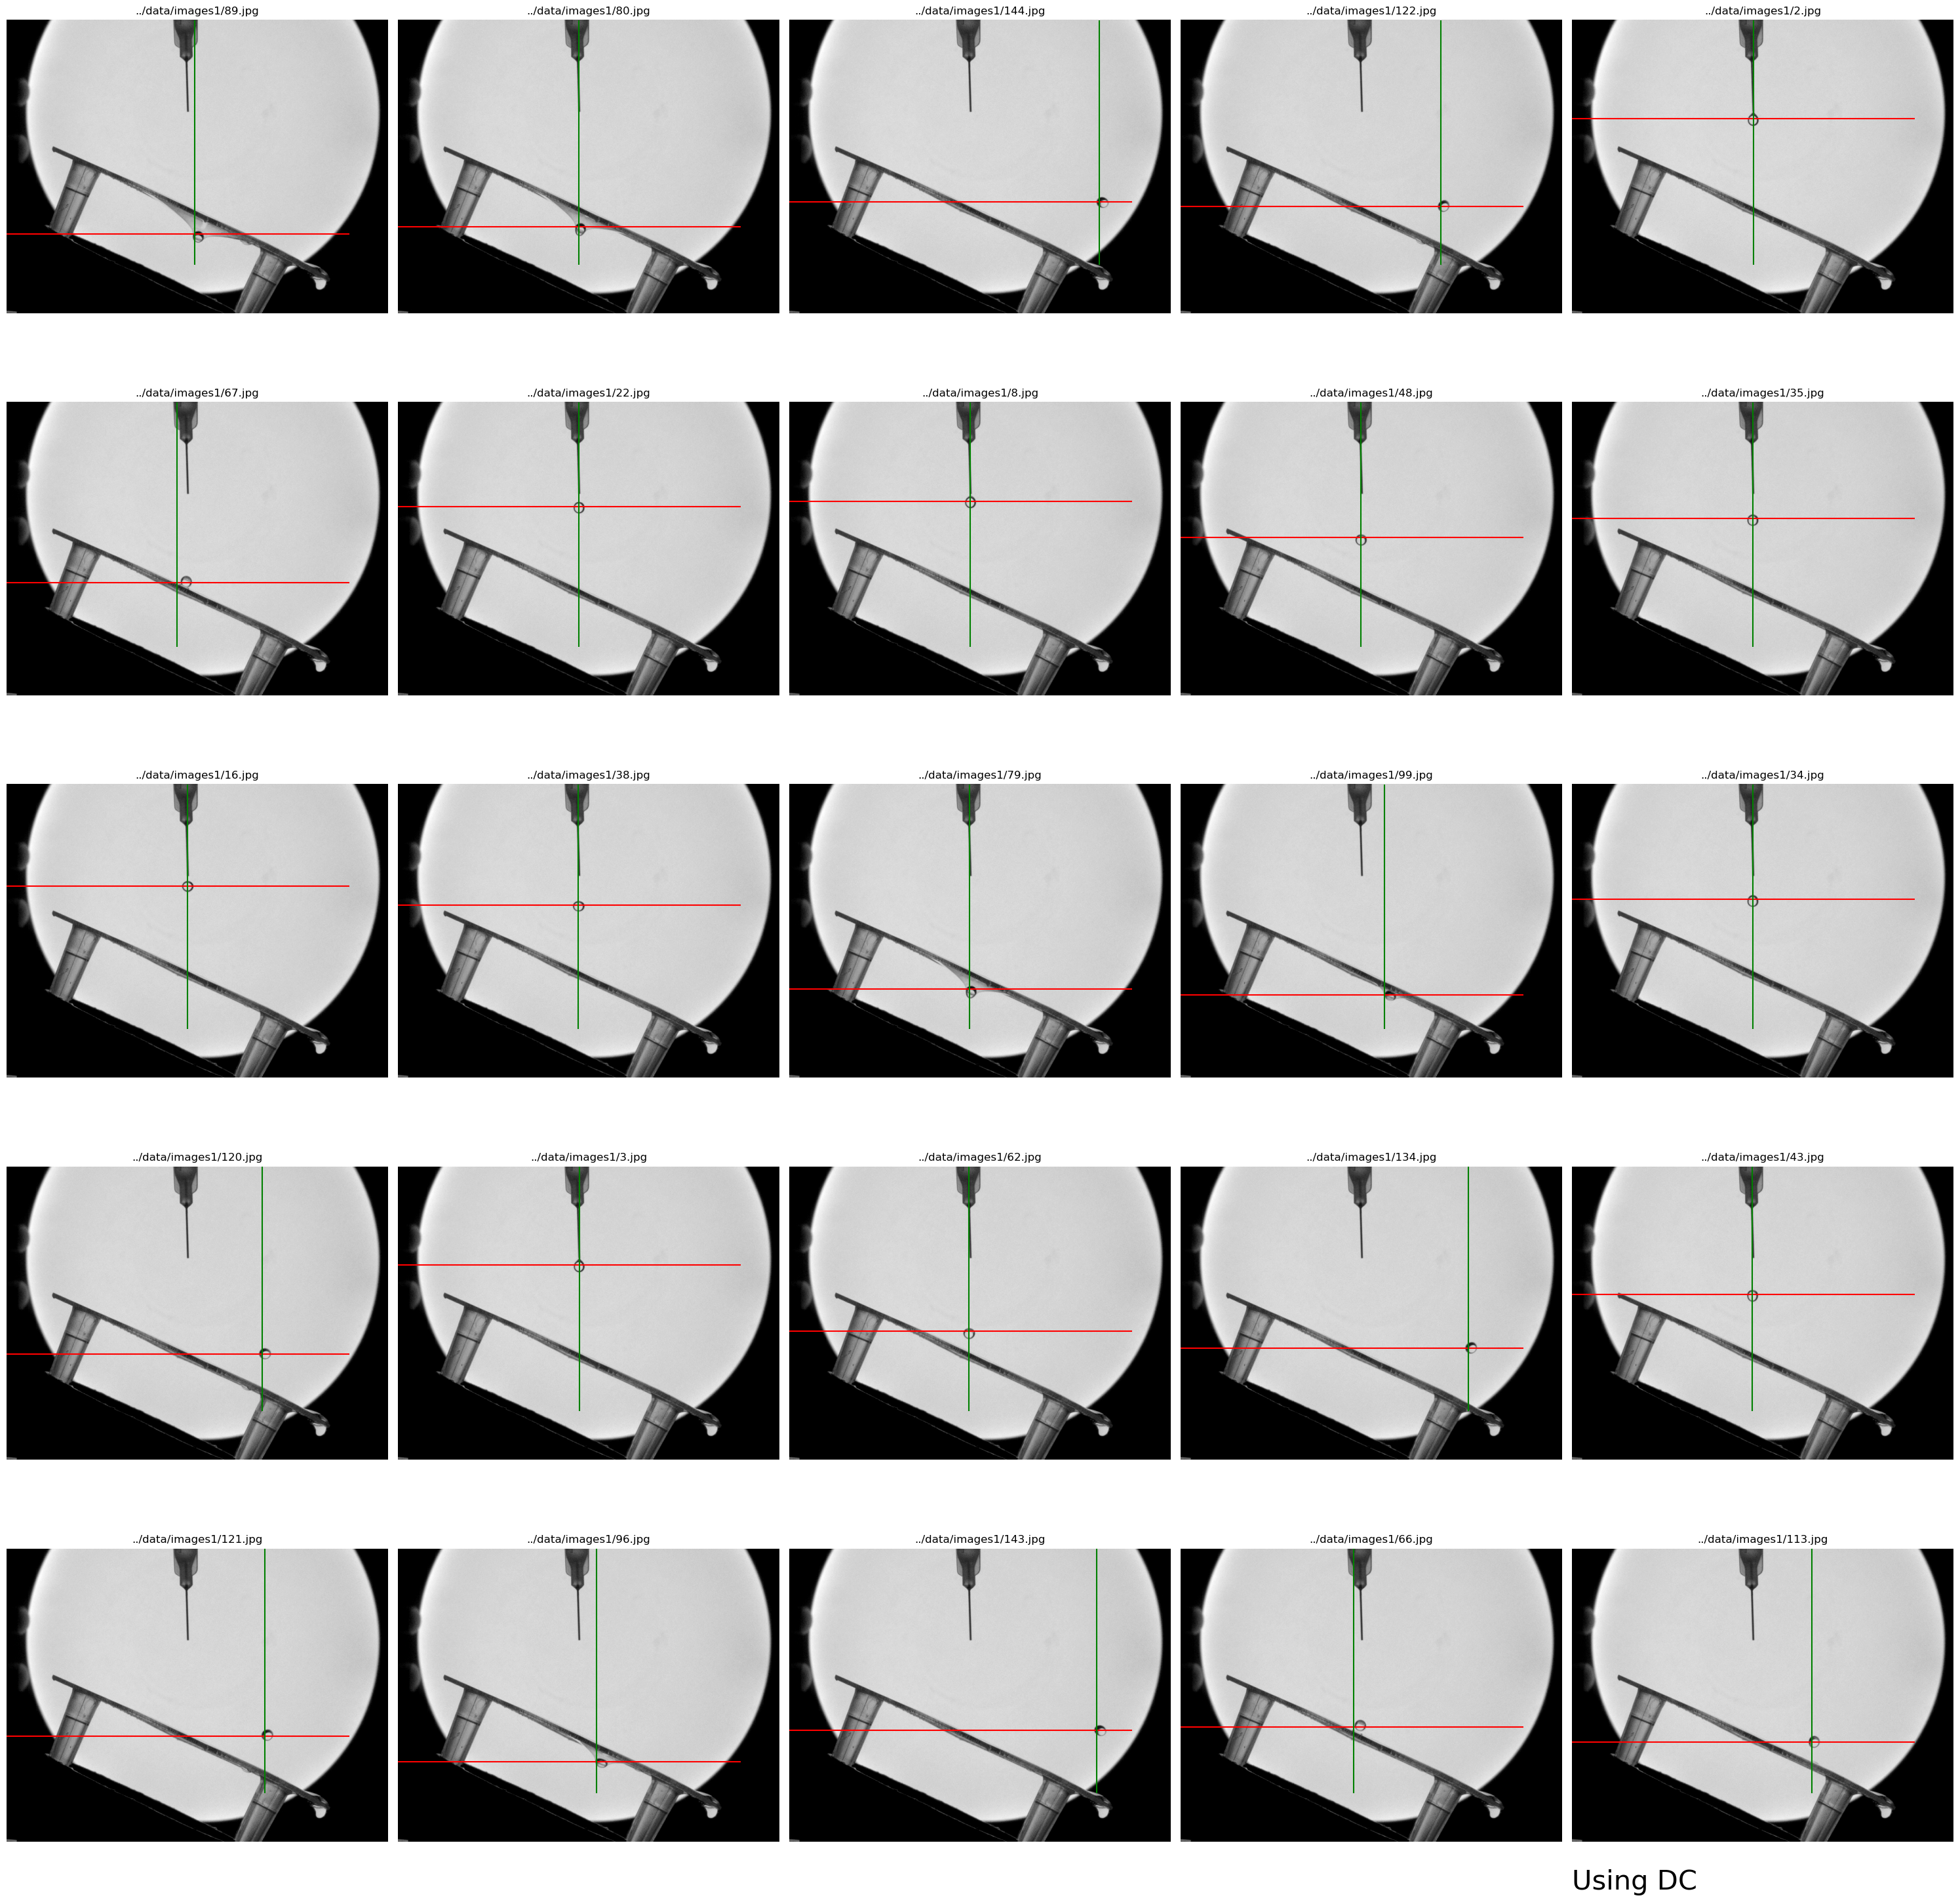

In [6]:
p.get_samples(len_samples = 25,
 file_name="using_dc", title="Using DC")

### Preliminary Analysis

In [4]:
#Smoothing the data
s = Smoother(df=r"C:\Users\harik\Desktop\mini-project\data\results\centers_using_dc.csv")
df_dc = s.smoothen()
df_dc

id            x           y    r1    r2     r  \
0      ../data/images1/0.jpg   870.587824  401.000000  10.0  13.0  11.0   
1      ../data/images1/1.jpg   870.618264  401.301569  10.0  13.0  11.0   
2      ../data/images1/2.jpg   870.639818  401.579694  10.0  13.0  11.0   
3      ../data/images1/3.jpg   870.652864  401.810550  10.0  13.0  11.0   
4      ../data/images1/4.jpg   870.657780  402.039705  10.0  13.0  11.0   
..                       ...          ...         ...   ...   ...   ...   
139  ../data/images1/150.jpg  1160.746077  576.424655  11.0   8.0   9.0   
140  ../data/images1/151.jpg  1165.276423  577.477595  11.0   8.0   9.0   
141  ../data/images1/152.jpg  1169.841369  578.584610  11.0   8.0   9.0   
142  ../data/images1/153.jpg  1174.439592  579.800151  11.0   8.0   9.0   
143  ../data/images1/154.jpg  1179.000000  581.000000  11.0   8.0   9.0   

           vy        vx         v  
0         NaN       NaN       NaN  
1         NaN       NaN       NaN  
2         NaN       NaN       NaN  
3         NaN       NaN       NaN  
4         NaN       NaN       NaN  
..        ...       ...       ...  
139  1.916808  4.826432  5.347604  
140  2.202874  4.853091  5.446056  
141  2.435243  4.888637  5.569656  
142  2.751182  4.963698  5.715468  
143  3.000000  5.000000  5.830952  

[119 rows x 9 columns]

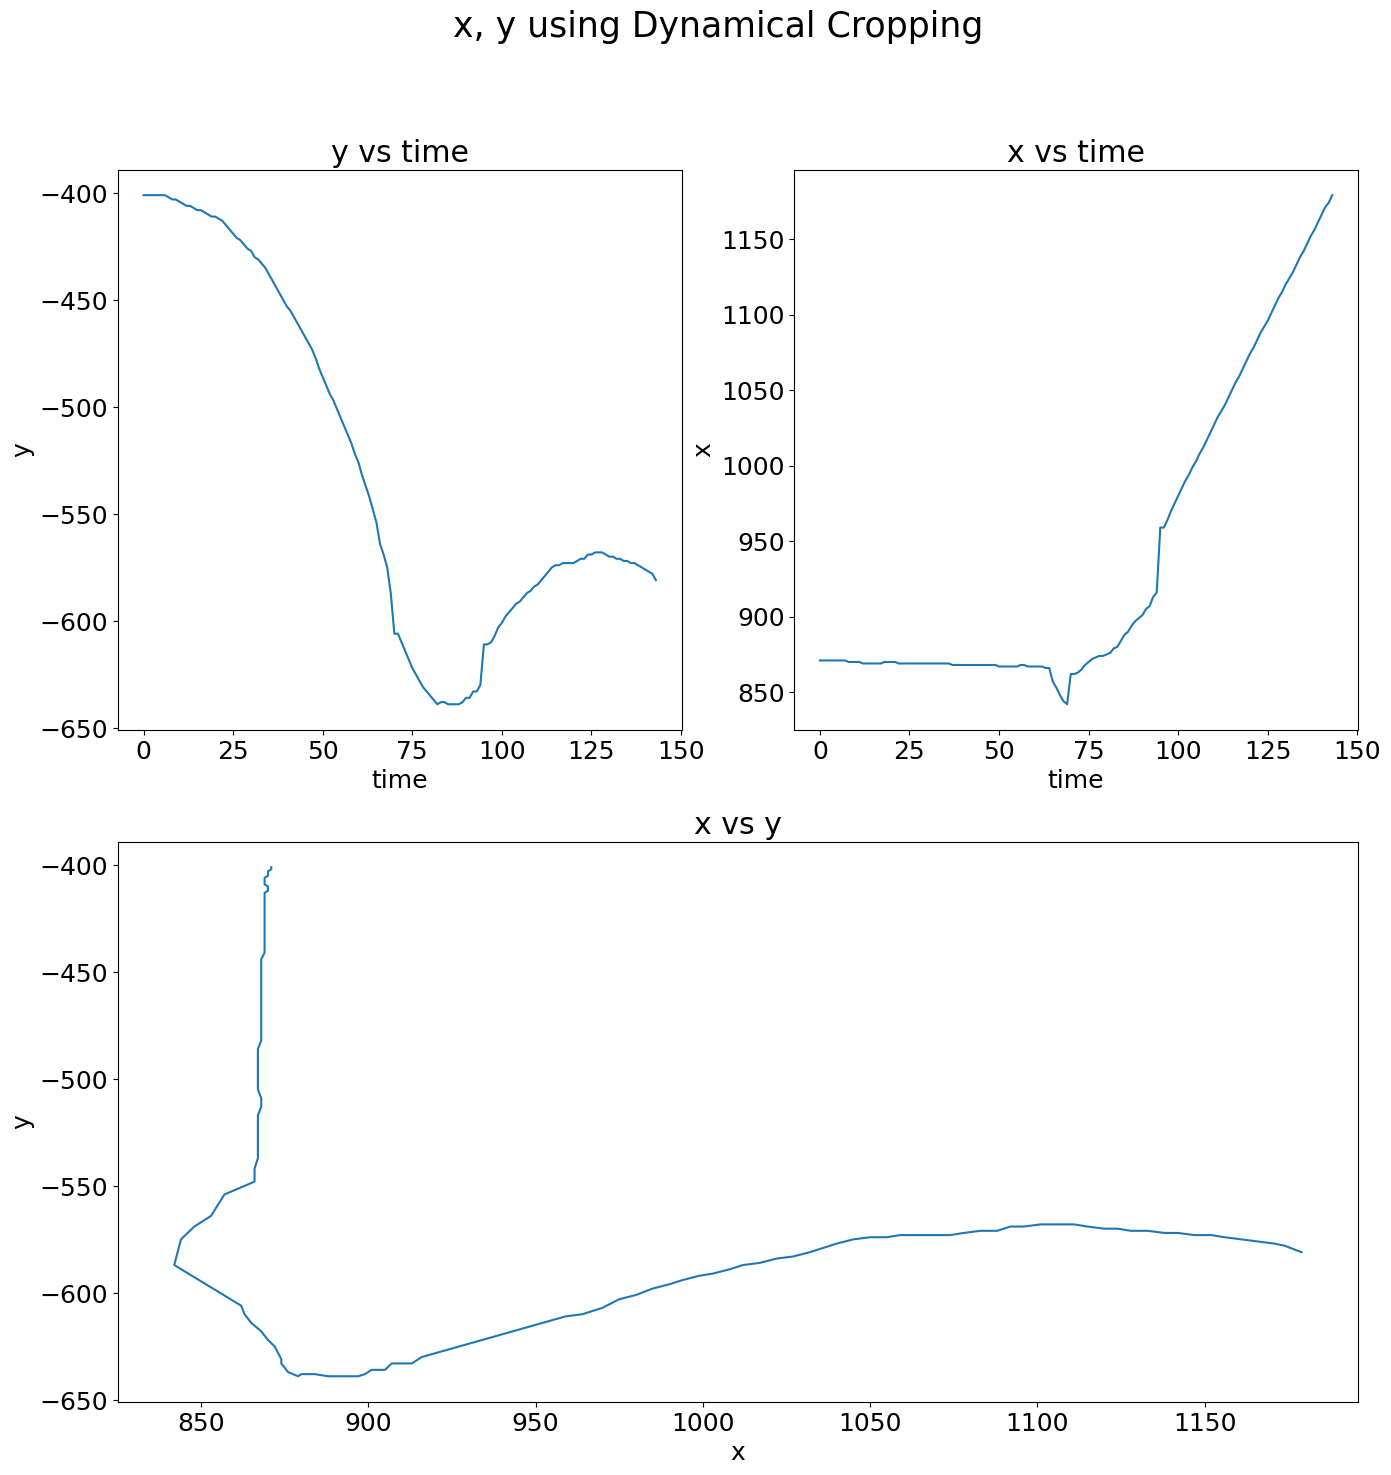

In [6]:
cols = ["x", "y"]
p.plot_all(title="x, y using Dynamical Cropping", cols = cols, smooth=False, file_name="x_y_using_dc.png")

There are some missing values between the timestamps 60 and 80. 

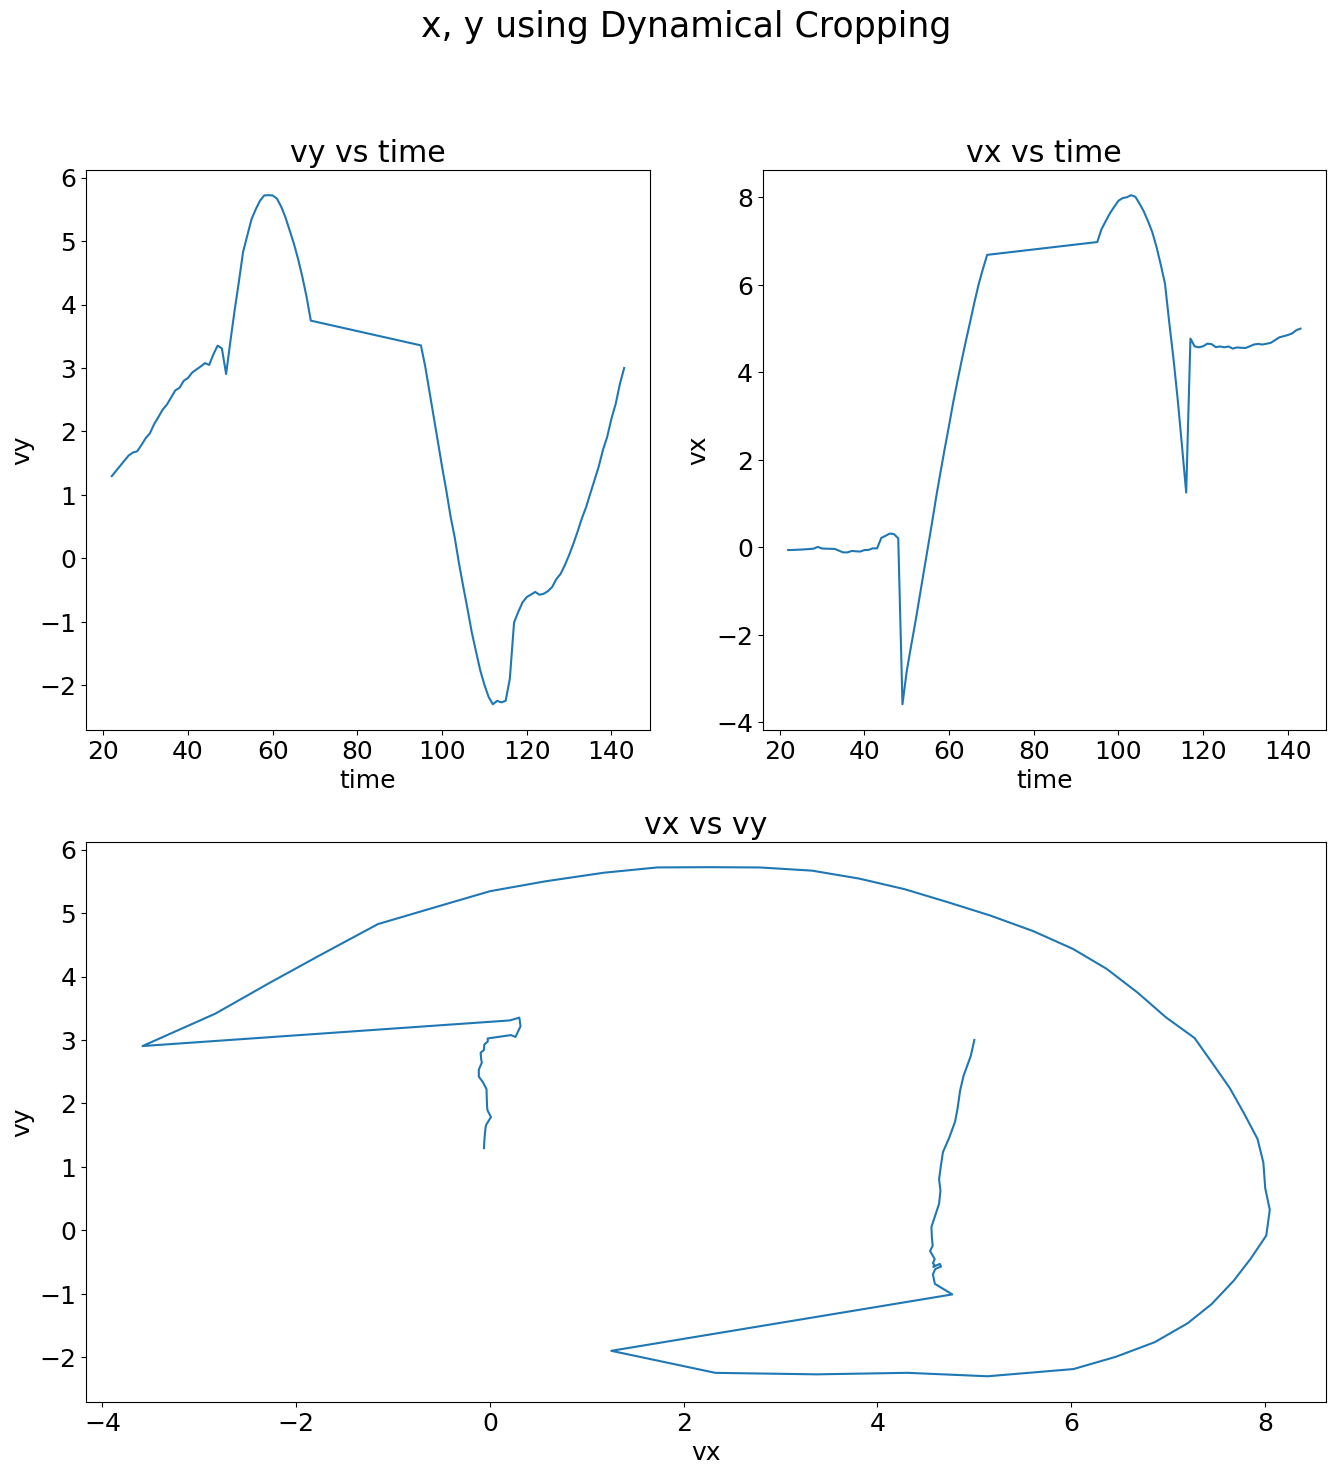

In [8]:
cols = ["vx", "vy"]
p.plot_all(title="x, y using Dynamical Cropping", cols = cols, smooth=True)

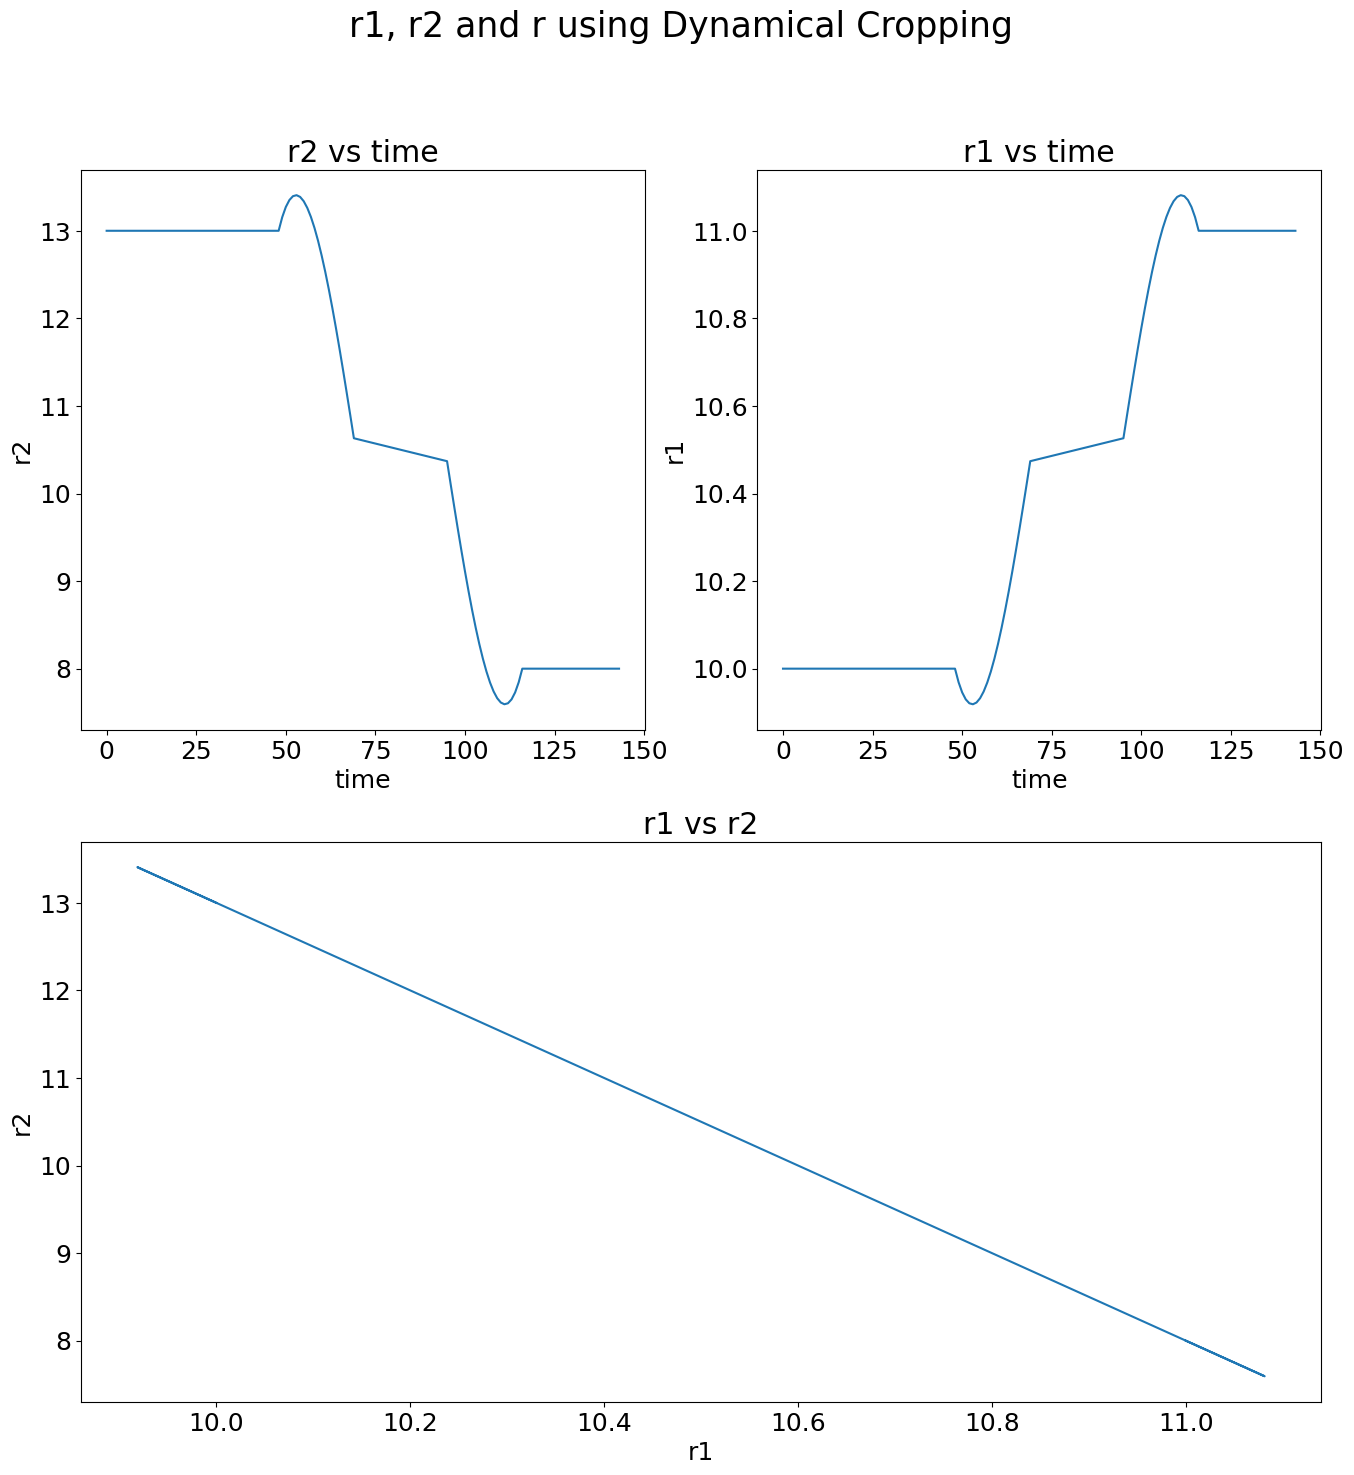

In [10]:
cols = ["r1", "r2"]
p.plot_all(title="r1, r2 and r using Dynamical Cropping", cols = cols)

# By Subtracting Images

In [11]:
df_si = r.subtracting_images(subtract=True, strict=False,
            plot=False)

Getting list of images...
Extracting data from images...
Error on:  ../data/images1/71.jpg
Error on:  ../data/images1/102.jpg
Error on:  ../data/images1/160.jpg
Error on:  ../data/images1/161.jpg
Error on:  ../data/images1/162.jpg
Error on:  ../data/images1/163.jpg
Error on:  ../data/images1/164.jpg
Error on:  ../data/images1/165.jpg
Error on:  ../data/images1/166.jpg
Error on:  ../data/images1/167.jpg
Error on:  ../data/images1/168.jpg
Error on:  ../data/images1/169.jpg
Error on:  ../data/images1/170.jpg
Saving to csv...
Done!


There are about a dozen of images where the method is not working.

### Getting Some Samples

In [7]:
p = Plotter(df= r"C:\Users\harik\Desktop\mini-project\data\results\centers_using_si.csv", save_path = DATA_DIRECTORY)
# p.get_samples(len_samples = 25,
#  file_name="using_si", title="Using SI")

### Preliminary Analysis

In [8]:
#Smoothing the data
s = Smoother(df=r"C:\Users\harik\Desktop\mini-project\data\results\centers_using_si.csv")
df_si = s.smoothen()
df_si

id            x           y         r1         r2  \
0      ../data/images1/0.jpg   870.497069  401.000000  10.000000  11.731707   
1      ../data/images1/1.jpg   870.496502  401.347136  10.052940  11.732085   
2      ../data/images1/2.jpg   870.525808  401.677822  10.105880  11.764228   
3      ../data/images1/3.jpg   870.546228  402.006239  10.127812  11.820382   
4      ../data/images1/4.jpg   870.558140  402.307052  10.157497  11.823029   
..                       ...          ...         ...        ...        ...   
149  ../data/images1/151.jpg  1170.823218  579.191151   9.607865  10.217432   
150  ../data/images1/152.jpg  1175.376631  580.361505   9.594252  10.207790   
151  ../data/images1/153.jpg  1179.918510  581.539232   9.586689  10.219134   
152  ../data/images1/154.jpg  1184.447154  582.745131   9.616185  10.189072   
153  ../data/images1/155.jpg  1189.000000  584.000000   9.612970  10.226130   

             r        vy        vx         v  
0    10.646436       NaN       NaN       NaN  
1    10.643978       NaN       NaN       NaN  
2    10.636604       NaN       NaN       NaN  
3    10.624315       NaN       NaN       NaN  
4    10.607109       NaN       NaN       NaN  
..         ...       ...       ...       ...  
149   9.536774  1.020798  4.923426  5.074575  
150   9.493099  1.085649  4.994706  5.146791  
151   9.449991  1.112876  5.033844  5.190442  
152   9.407071  1.140480  5.071469  5.232244  
153   9.403101  1.206466  5.177349  5.338052  

[128 rows x 9 columns]

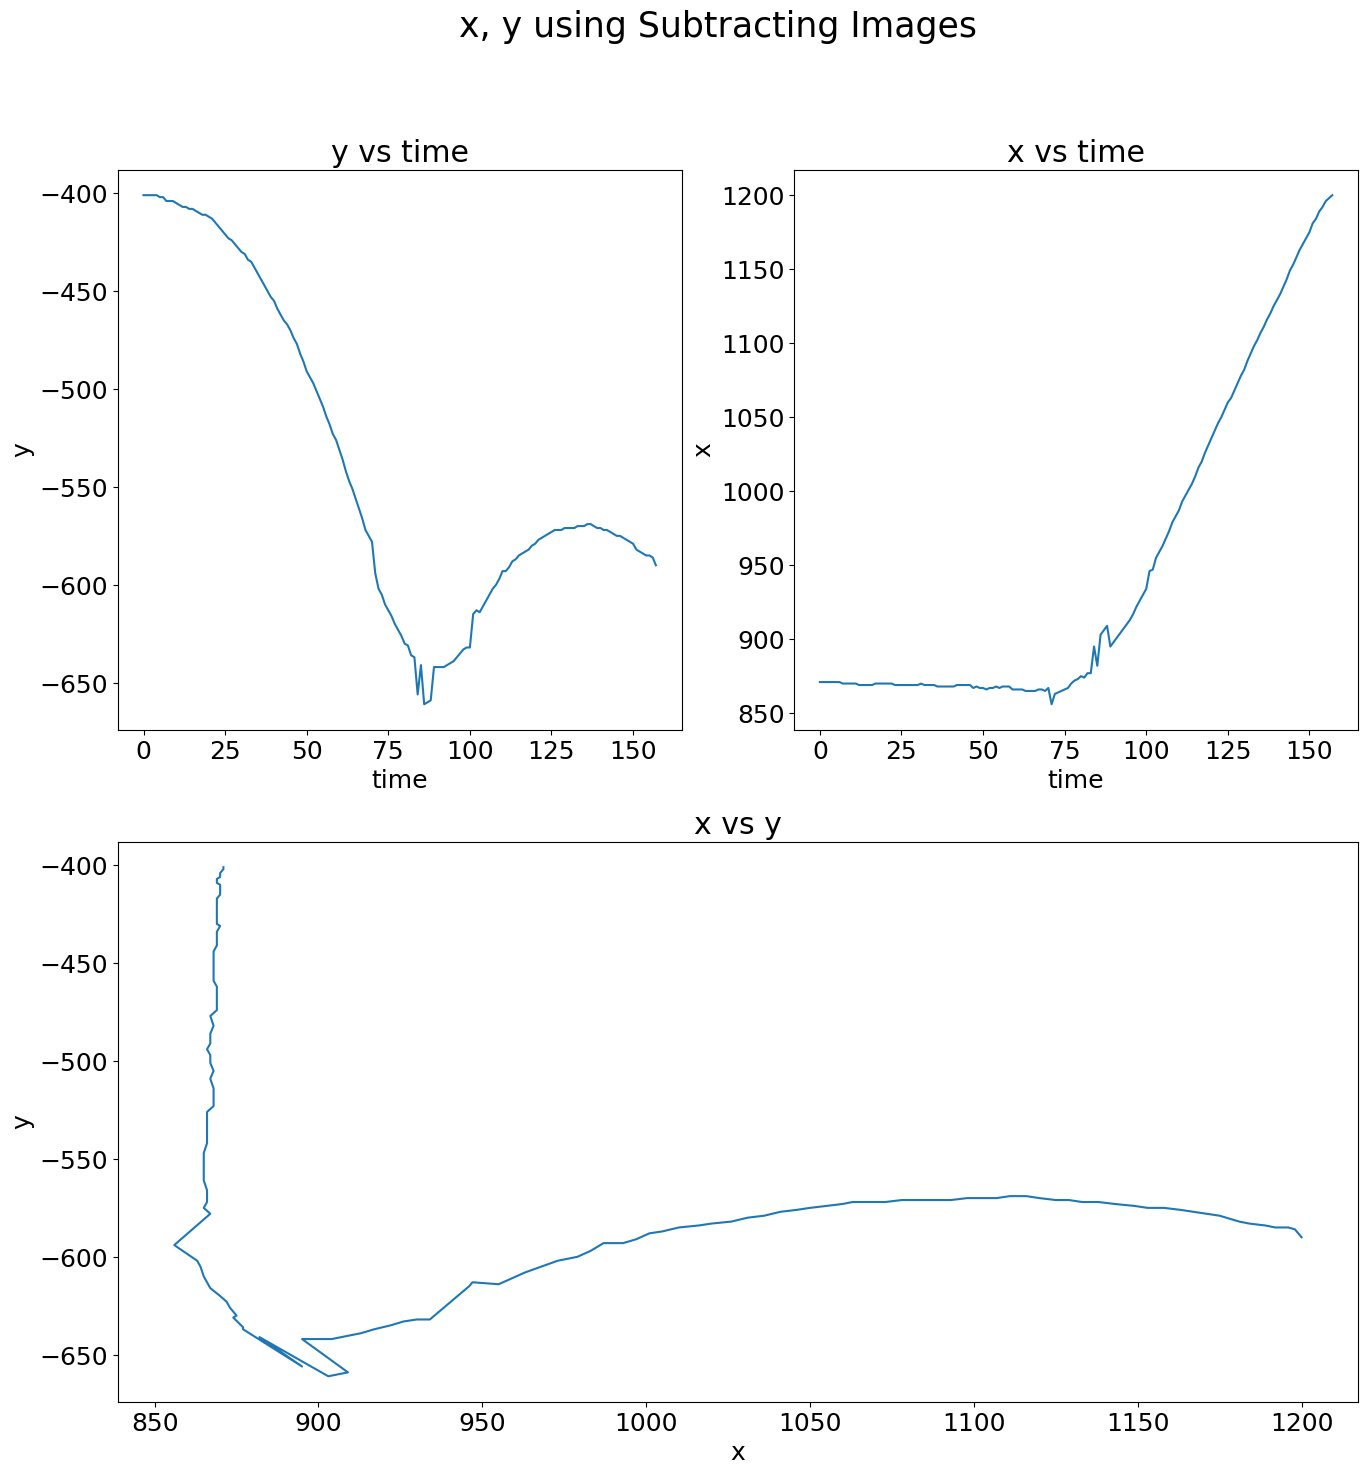

In [9]:
cols = ["x", "y"]
p.plot_all(title="x, y using Subtracting Images", cols = cols, smooth=False, file_name="x_y_using_si.png")

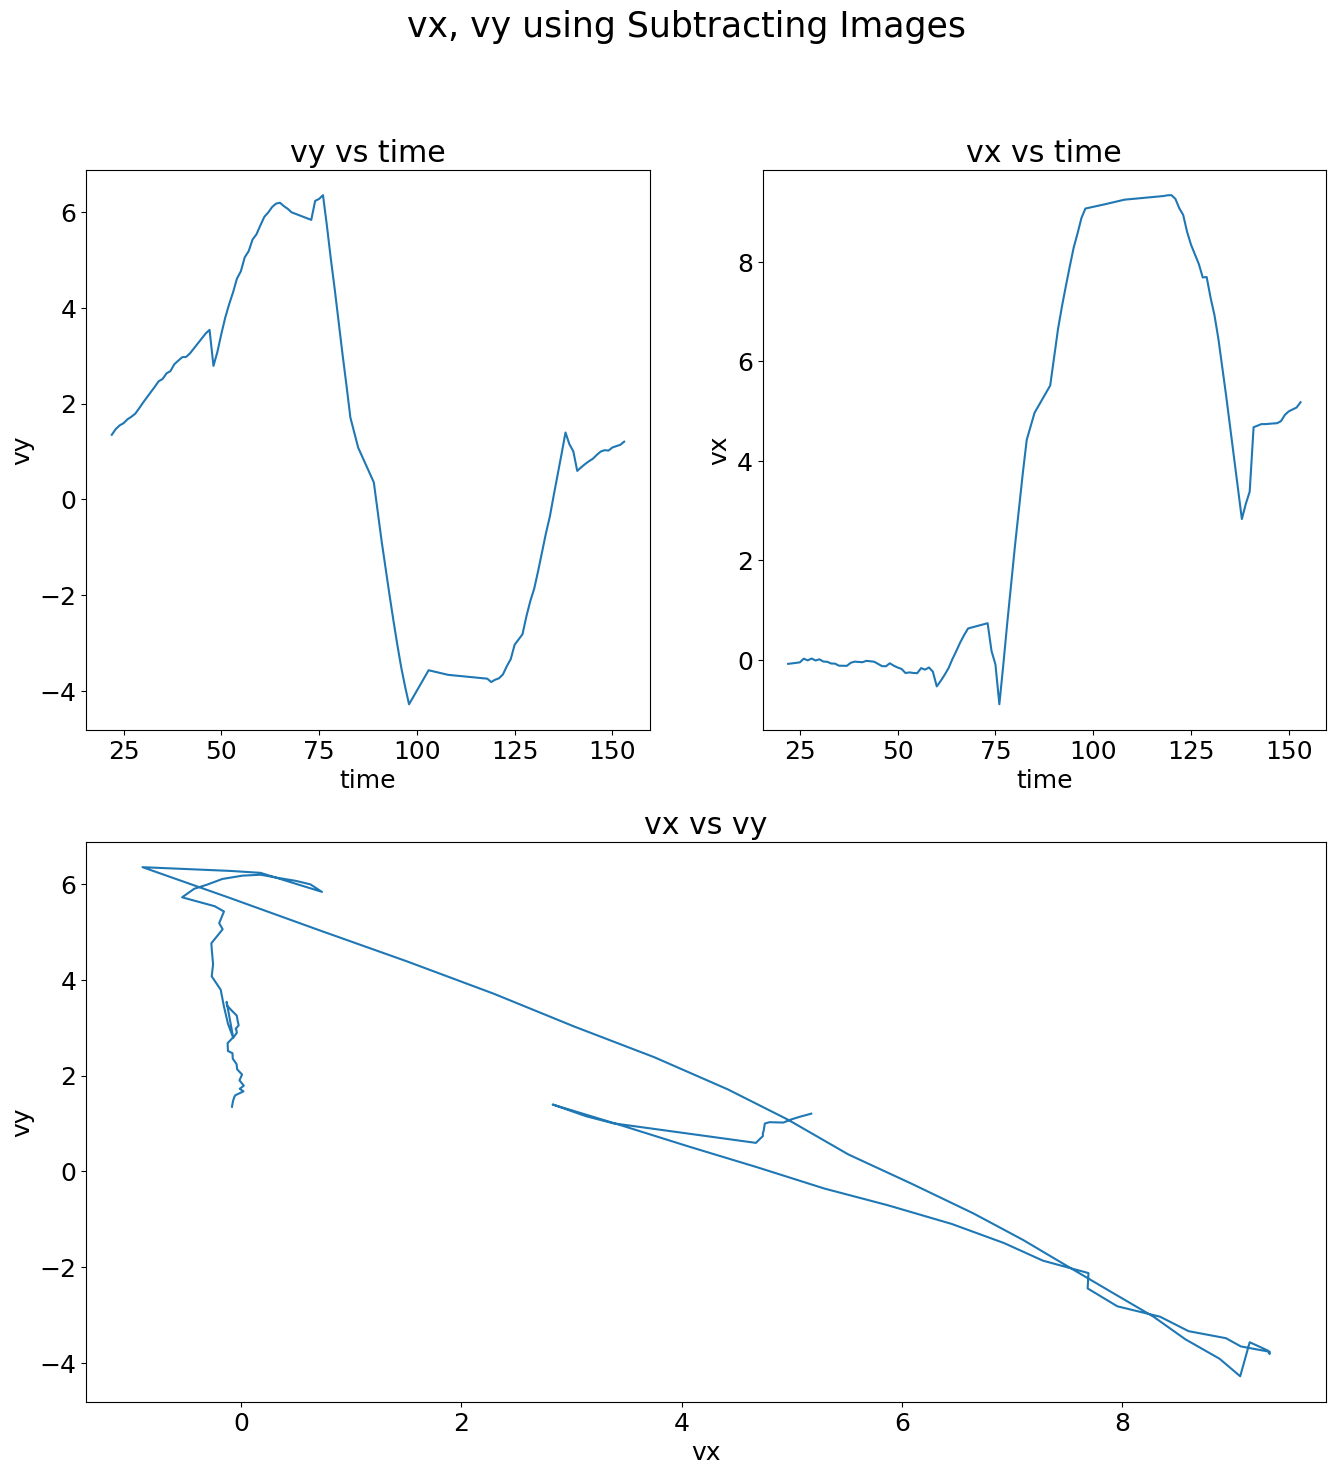

In [19]:
cols = ["vx", "vy"]
p.plot_all(title="vx, vy using Subtracting Images", cols = cols)

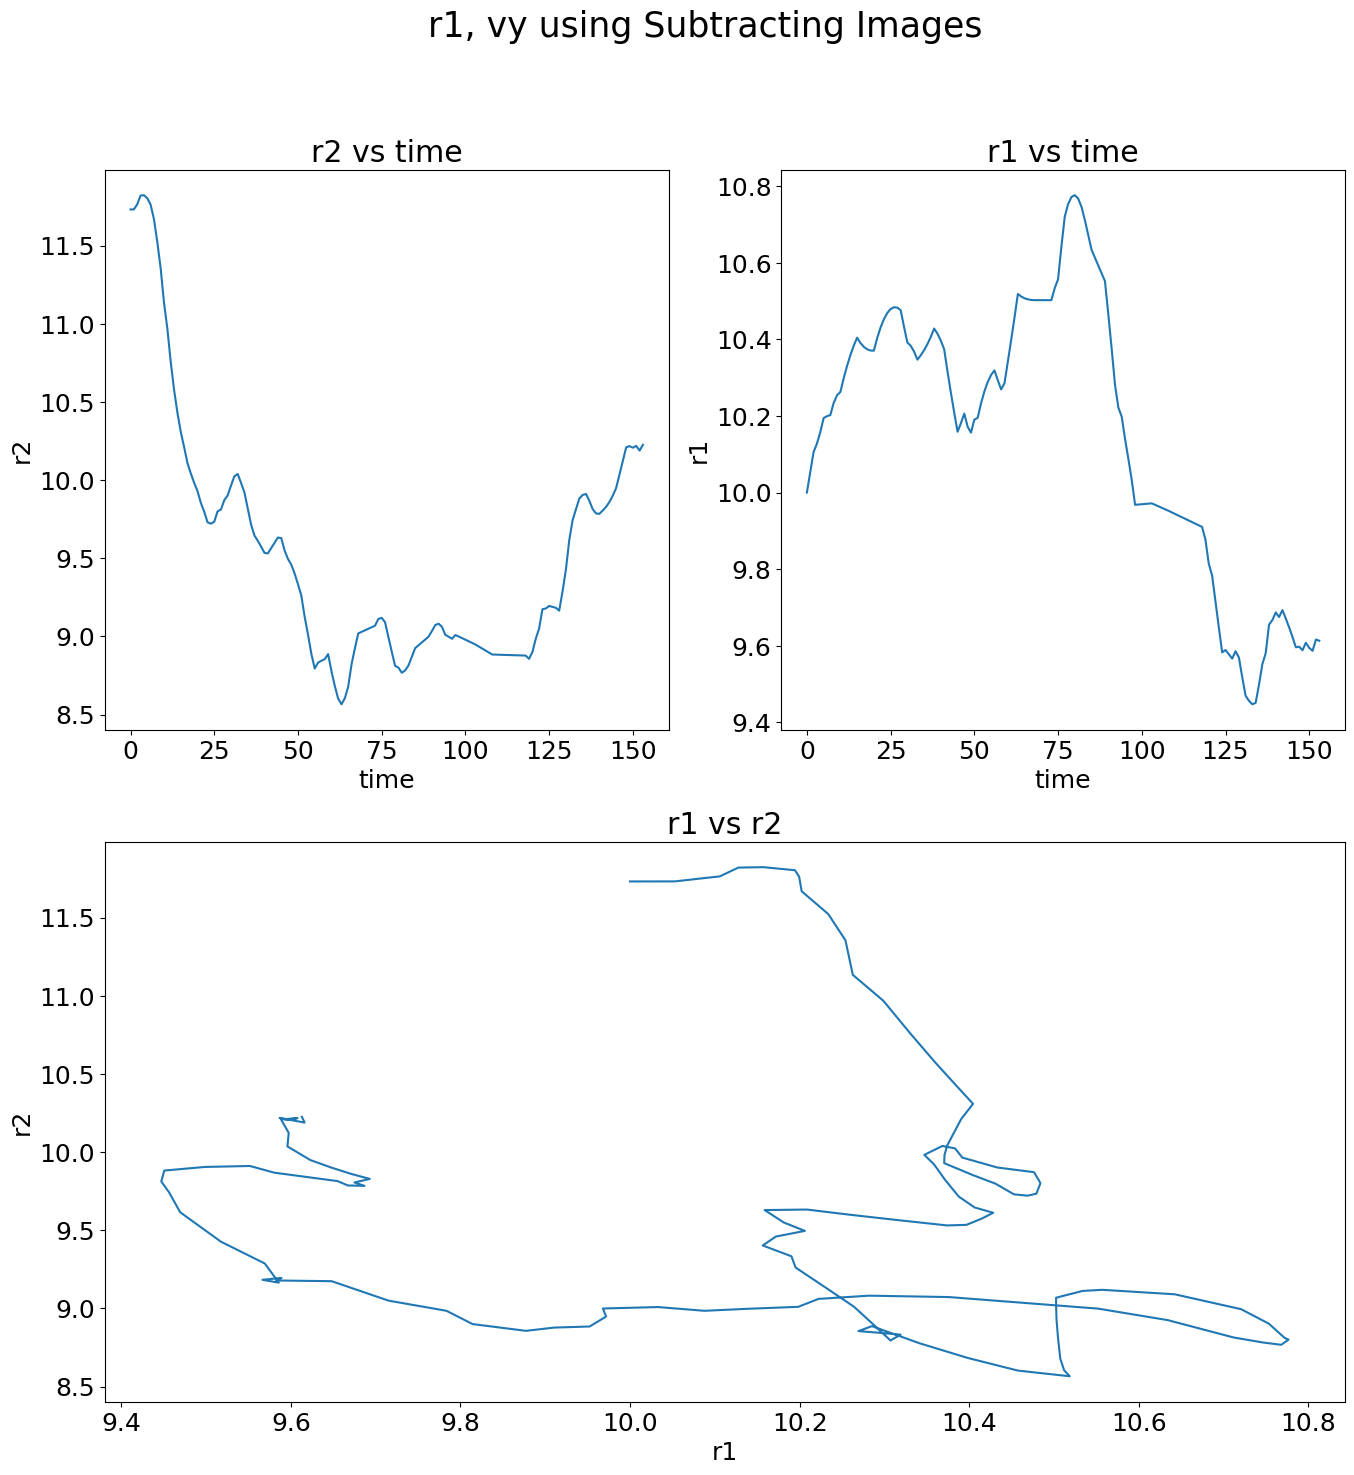

In [20]:
cols = ["r1", "r2"]
p.plot_all(title="r1, vy using Subtracting Images", cols = cols)

# By Fitting Ellipse

In [21]:
df_ap = r.all_points(plot=False, crop_included=True)

Getting list of images...
Extracting data from images...
Error on:  ../data/images1/71.jpg
Error on:  ../data/images1/72.jpg
Error on:  ../data/images1/102.jpg
Error on:  ../data/images1/159.jpg
Error on:  ../data/images1/160.jpg
Error on:  ../data/images1/161.jpg
Error on:  ../data/images1/162.jpg
Error on:  ../data/images1/163.jpg
Error on:  ../data/images1/164.jpg
Error on:  ../data/images1/165.jpg
Error on:  ../data/images1/166.jpg
Error on:  ../data/images1/167.jpg
Error on:  ../data/images1/168.jpg
Error on:  ../data/images1/169.jpg
Error on:  ../data/images1/170.jpg
Saving to csv...
Done!


Again, there are about a dozen of images where the method is not working.

### Getting Some Samples

In [10]:
p = Plotter(df= r"C:\Users\harik\Desktop\mini-project\data\results\centers_using_ap.csv", save_path = DATA_DIRECTORY)
# p.get_samples(len_samples = 25,
#  file_name="using_ap", title="Fitting Ellipse")

### Preliminary Analysis

In [11]:
#Smoothing the data
s = Smoother(df=r"C:\Users\harik\Desktop\mini-project\data\results\centers_using_ap.csv")
df_ap = s.smoothen()
df_ap

id            x           y        r1         r2  \
0      ../data/images1/0.jpg   869.000000  403.000000  8.000000  11.239176   
1      ../data/images1/1.jpg   869.070524  403.147287  8.213651  11.240499   
2      ../data/images1/2.jpg   869.179429  403.278881  8.425789  11.244470   
3      ../data/images1/3.jpg   869.256192  403.440726  8.603895  11.313103   
4      ../data/images1/4.jpg   869.331064  403.639629  8.847230  11.306863   
..                       ...          ...         ...       ...        ...   
150  ../data/images1/153.jpg  1180.119304  582.475137  9.773870  10.373417   
151  ../data/images1/154.jpg  1184.573076  583.823785  9.758366  10.364719   
152  ../data/images1/155.jpg  1189.052562  585.211760  9.714124  10.419739   
153  ../data/images1/156.jpg  1193.525808  586.595198  9.741917  10.437323   
154  ../data/images1/157.jpg  1198.000000  588.000000  9.701834  10.495368   

        theta         r        vy        vx         v  
0    0.251548  9.969370       NaN       NaN       NaN  
1    0.330962  9.969749       NaN       NaN       NaN  
2    0.340577  9.970883       NaN       NaN       NaN  
3    0.403795  9.972774       NaN       NaN       NaN  
4    0.403282  9.975421       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...  
150  1.199565  9.943846  1.487238  4.511817  4.764998  
151  1.223732  9.903573  1.613916  4.504065  4.755489  
152  1.234078  9.896956  1.776139  4.494990  4.774608  
153  1.237128  9.892985  1.902628  4.492721  4.800438  
154  1.213515  9.891662  2.000000  4.528266  4.834646  

[137 rows x 10 columns]

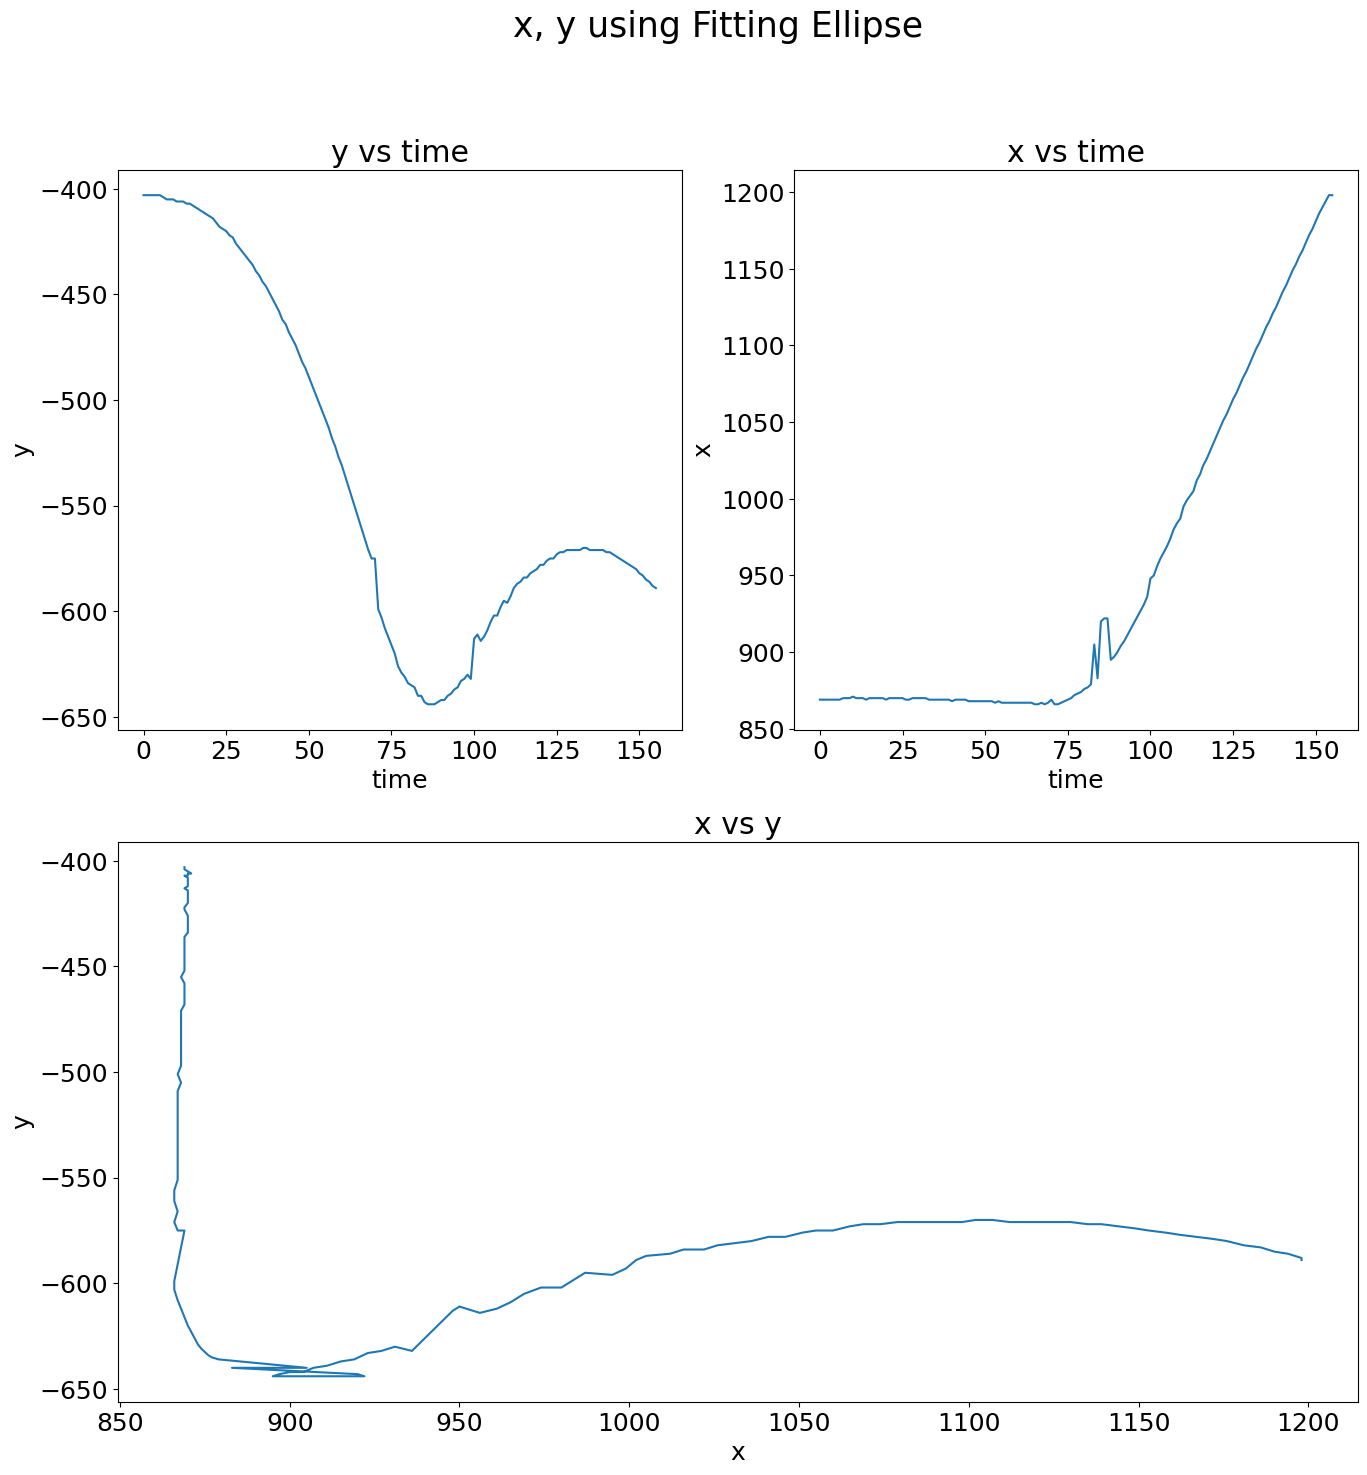

In [13]:
cols = ["x", "y"]
p.plot_all(title="x, y using Fitting Ellipse", cols = cols, smooth=False, file_name="x_y_using_ap.png")

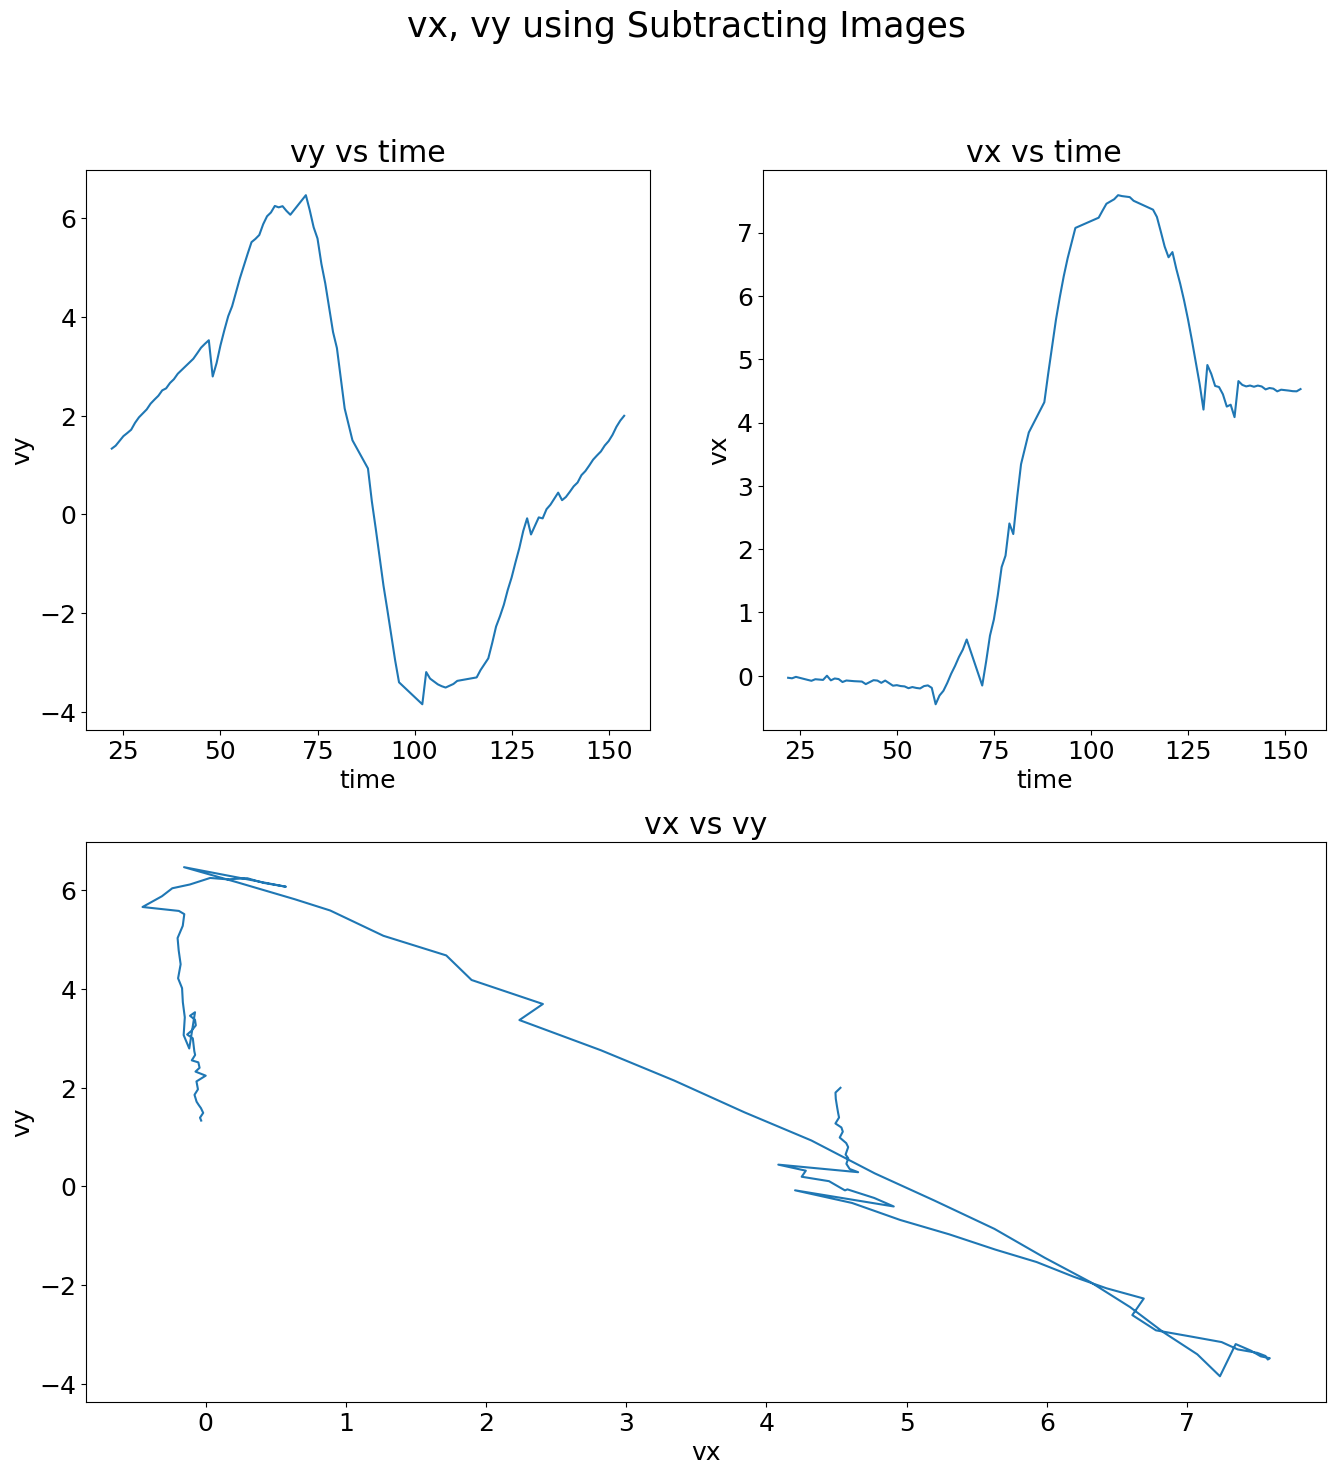

In [26]:
cols = ["vx", "vy"]
p.plot_all(title="vx, vy using Subtracting Images", cols = cols)

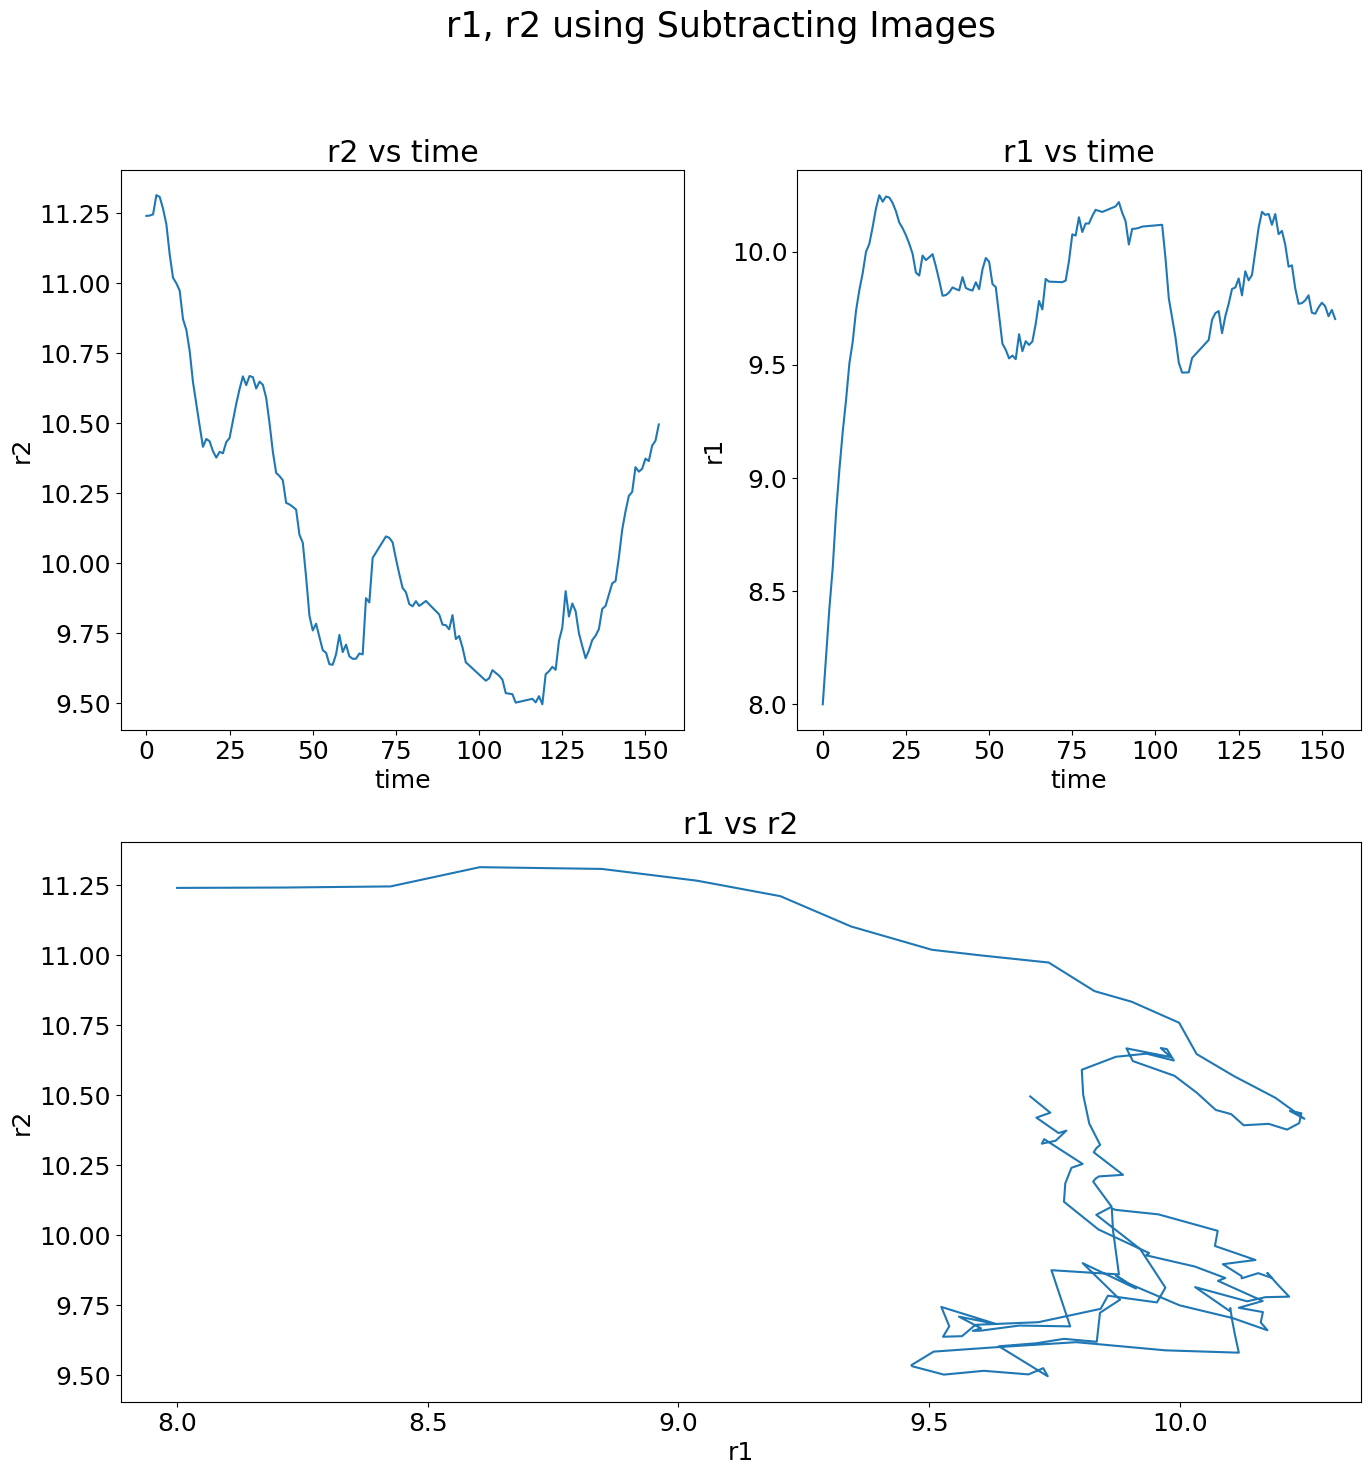

In [27]:
cols = ["r1", "r2"]
p.plot_all(title="r1, r2 using Subtracting Images", cols = cols)

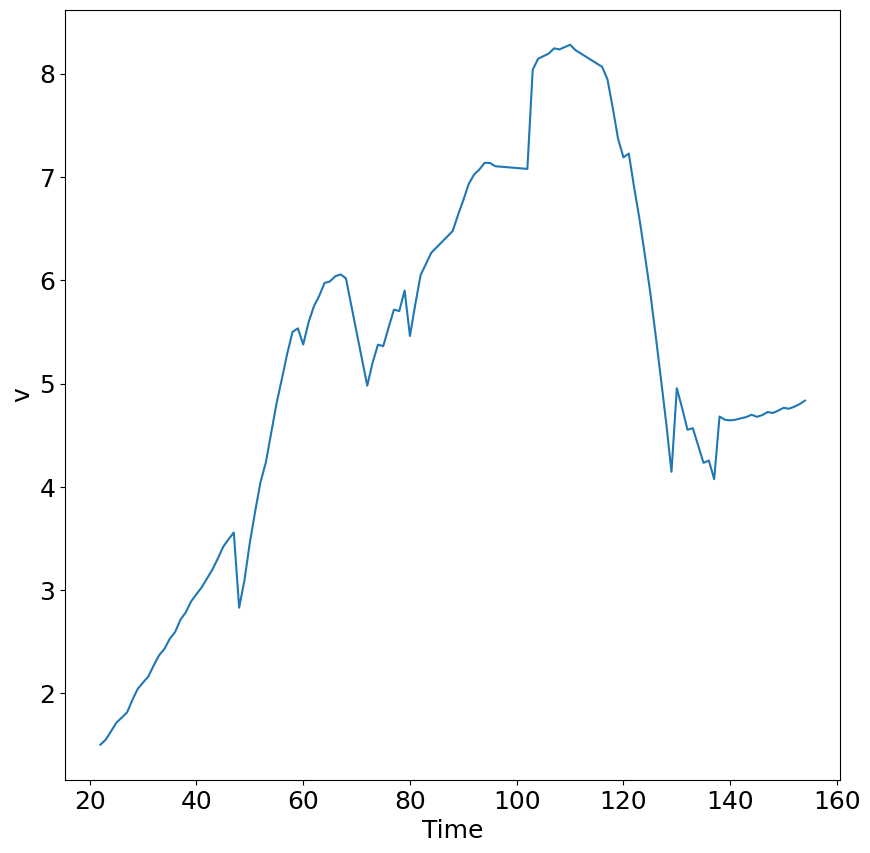

In [29]:
p.plot_one("v")

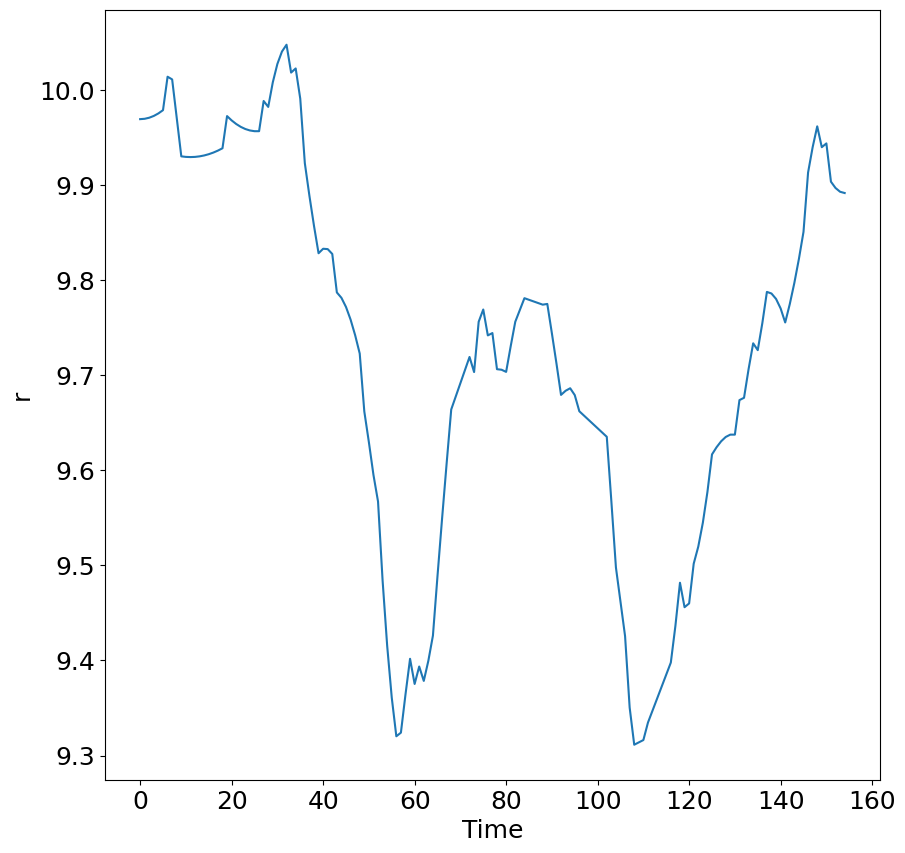

In [30]:
p.plot_one("r")

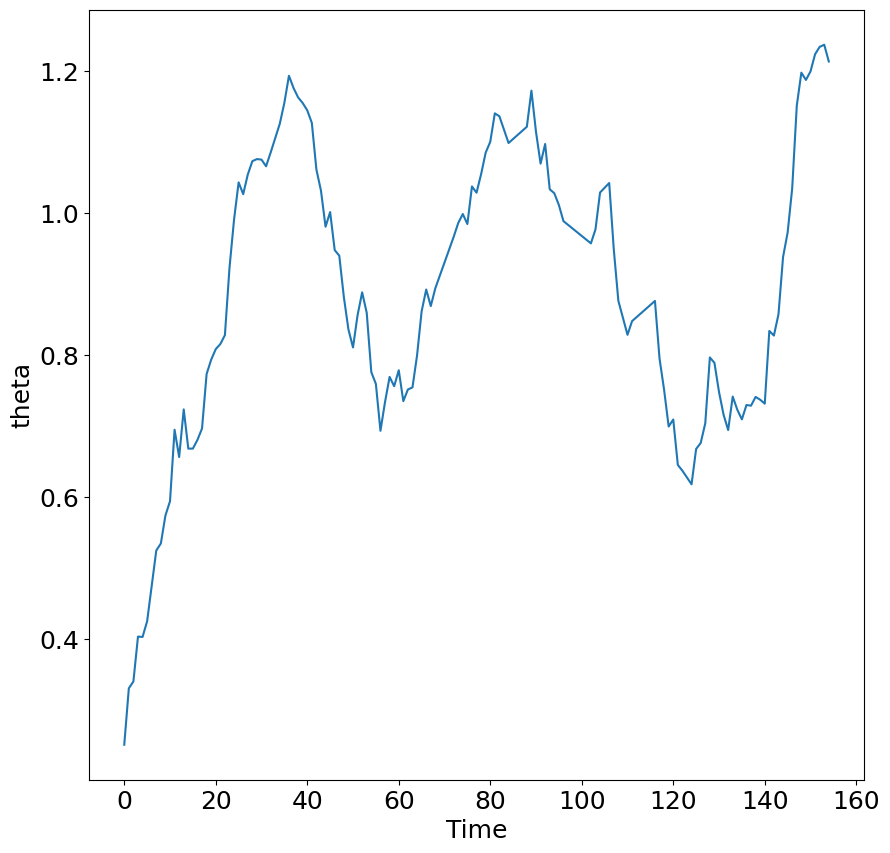

In [28]:
p.plot_one("theta")